In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [95]:
from google.colab import files

uploaded = files.upload()


Saving fraudTrain.csv to fraudTrain (1).csv


In [29]:
from google.colab import files

uploaded = files.upload()

Saving fraudTest.csv to fraudTest (1).csv


In [70]:
train_d = pd.read_csv('fraudTrain.csv',parse_dates=['trans_date_trans_time',])
test_d = pd.read_csv('fraudTest.csv')

numeric_columns_train = train_d.select_dtypes(include='number')
numeric_columns_test = test_d.select_dtypes(include='number')

In [71]:
x_train = numeric_columns_train.drop(['is_fraud'], axis=1)
y_train = train_d['is_fraud']

x_test = numeric_columns_test.drop(['is_fraud'], axis=1)
y_test = test_d['is_fraud']

In [73]:
s = StandardScaler()
x_train_scaled = s.fit_transform(x_train)
x_test_scaled = s.transform(x_test)

In [74]:
train_d.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [75]:
train_d.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [87]:
train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [92]:

train_d = train_d.drop('Unnamed: 0', axis=1)


In [93]:

train_d.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [88]:
train_d.isnull().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

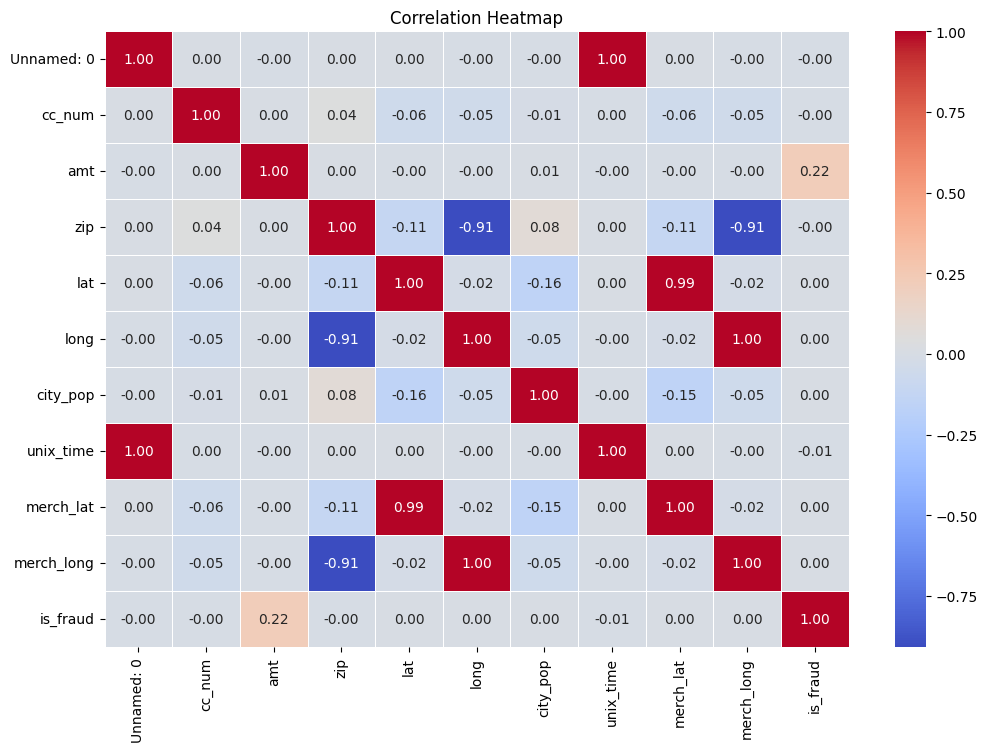

In [76]:
num_data = train_d.select_dtypes(include=['number'])

corr_matrix = num_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [90]:
numeric_col = train_d.select_dtypes(include='number')
fraud_corr = numeric_col.corr()['is_fraud'].abs().sort_values(ascending=False)

print(fraud_corr)

is_fraud      1.000000
amt           0.219404
unix_time     0.005078
Unnamed: 0    0.004767
zip           0.002162
city_pop      0.002136
lat           0.001894
merch_lat     0.001741
merch_long    0.001721
long          0.001721
cc_num        0.000981
Name: is_fraud, dtype: float64


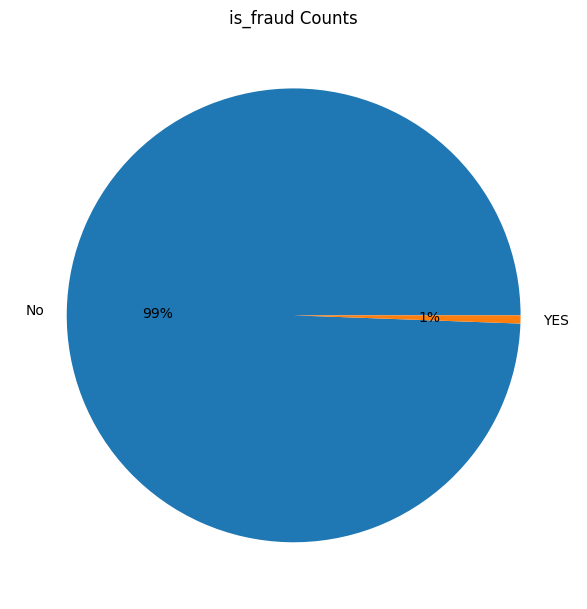

In [77]:
counts = train_d["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

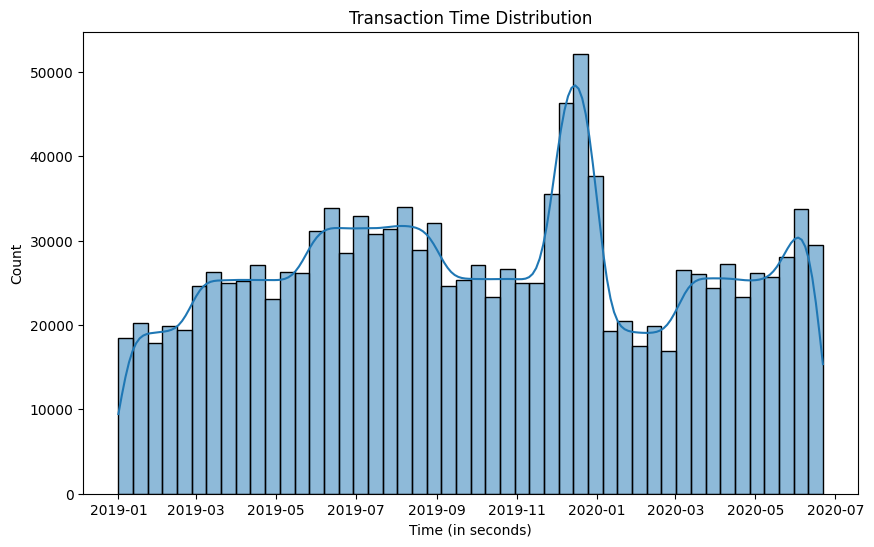

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(train_d['trans_date_trans_time'], bins=48, kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')


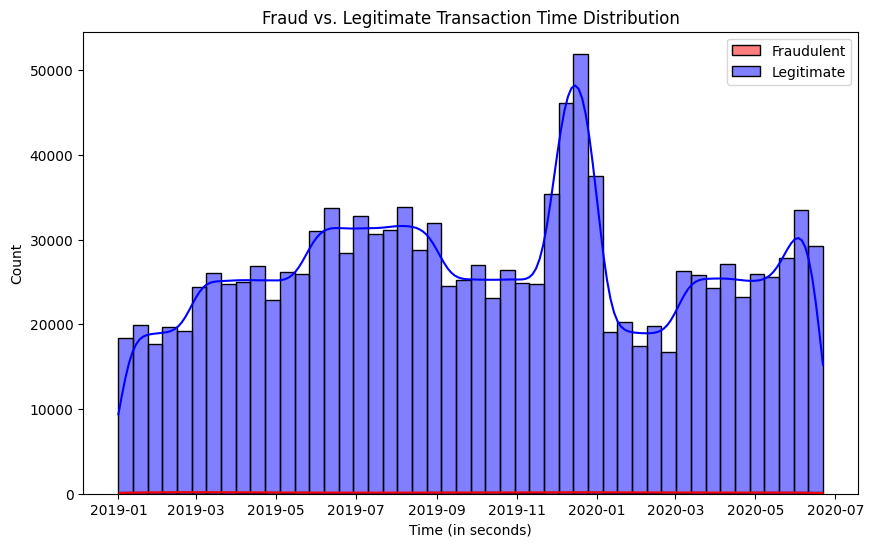

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(train_d[train_d['is_fraud'] == 1]['trans_date_trans_time'], bins=48, kde=True, color='red', label='Fraudulent')
sns.histplot(train_d[train_d['is_fraud'] == 0]['trans_date_trans_time'], bins=48, kde=True, color='blue', label='Legitimate')
plt.title('Fraud vs. Legitimate Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')
plt.legend()

plt.show()

In [80]:
model = LogisticRegression(random_state=42)
model.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

In [81]:
y_pred = model.predict(x_test_scaled)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)

In [85]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_rep}")

Accuracy: 0.9959961779244546
Confusion Matrix:
[[553494     80]
 [  2145      0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

